# 1.B: Model the radioactivity experiment

**Question:** What is the activity of this radioactive source? 

Answering this question generally requires a mathematical representation of the experiment (aka a **Model**). 

 - With the model, we can do two important things:
   - produce simulated data (typically more quickly than with the actual experiment)
   - calculate the probability (density) of data
   
Models are not intended to be perfect representations of actual experiments ("all models are wrong")
 - They can be useful when they: 
   - serve as a well defined reference
   - capture important aspects of the system under study

Challenge for this example: we don't know the true activity of the source (that is what we are trying to determine!)

In [1]:
# Import modules needed for this tutorial

from trisep.RadioactiveSource import RadioactiveSource
from trisep.RadiationCounter import SimulatedRadiationCounter
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background') # only include this if you use a dark background for Jupyter Lab

### Construct the model of the experiment

 - a simulated radiactive source: Assume activity is 0.6 Bq
 - a simulated detector


In [2]:
simulated_source = RadioactiveSource(0.6) # specifies the activity of simulated source

sim_detector = SimulatedRadiationCounter() # this is NOT the lab detector, just a simulation of a detector
sim_detector.set_counting_time(10)
sim_detector.insert_calibration_source(simulated_source)

Simulated detector built. Counting time = 10.0 Efficiency = 1.0 Background rate= 0.0 (Hz)


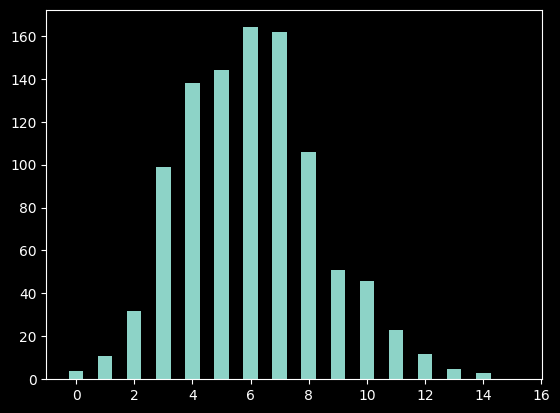

In [3]:
# Make 1000 measurements with the simulated detector

sim_counts = sim_detector.get_data(1000)

plt.hist(sim_counts,bins=np.arange(0.,16.,0.5), align='left')
plt.show()

## Likelihood

Just like the lab experiment, the simulated experiment does not give the same result for each repetition. Observing 6 decays is more likely than observing 10 decays for this model.

Likelihood is the probability (probability density, in the case of a continuous observable) of producing the observation (according to the model)

**Question**: What is the likelihood for the observation of 6 decays in 10 seconds if the true activity is 0.6 Bq?

In [4]:
# Use the model to calculate the likelihood that a source with activity 0.6 Bq produces 6 decays in 10 seconds

observed = 6
simulated_source.set_activity(0.6)
likelihood = sim_detector.get_likelihood(observed)
print('Probability to see', observed,'decays is',round(likelihood,4))

Probability to see 6 decays is 0.1606


## Likelihood function

After observing the number of decays, $n$, the true activity remains unknown. The likelihood function is
the probability of observing $n$, as a function of the unknown parameter, activity, $a$:

$${\cal L}(a) = P(n|a)$$

Note that the likelihood function is considered to be a function of the parameter $a$ (the activity), not the data $n$. As such, it is NOT a probability distribution for the parameter $a$.

A good way to estimate the parameter is to find the value which maximizes the likelihood.

Text(0.5, 1.0, 'Likelihood function for 6 observed decays')

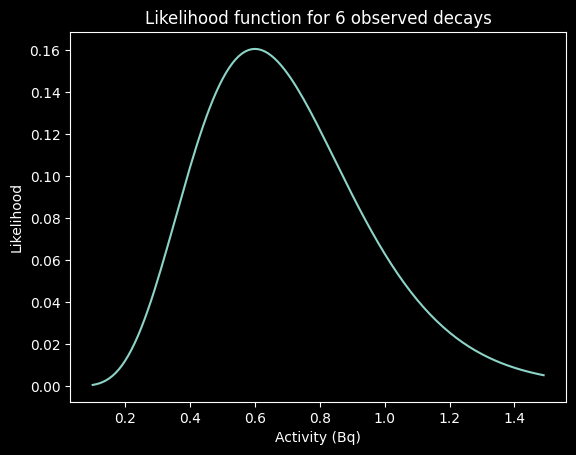

In [5]:
# Make a plot of likelihood function (over the range 0.1 to 1.5 Bq)

a_values = np.arange(0.1,1.5,0.01)
likelihood_values = []

for a in a_values:
    simulated_source.set_activity(a)
    likelihood = sim_detector.get_likelihood(observed)
    likelihood_values.append(likelihood)

plt.plot(a_values,likelihood_values)
plt.ylabel('Likelihood')
plt.xlabel('Activity (Bq)')
plt.title('Likelihood function for 6 observed decays')



**Question**: For this problem, is the likelihood always maximum at $\hat{a} = n / t$?

**Answer**: Yes. We can show this mathematically.
 - Derive the probability distribution that applies (Poisson distribution) given the parameter $a$.
   - $N$ is a *random variable* - in this example it is represented by the sim_detector.get_count() method
   - $n$ is an outcome of the random variable (aka *random variate*) - it is represented by a value returned by the get_count() method
 - Maximize the likelihood function analytically (by setting $\partial {\cal L}(a)/\partial a|_{a=\hat{a}} = 0$)

## Common method to find an approximate 68% or 90% confidence interval

The parameter range for which the log likelihood is within 0.5 of the maximum log likelihood
is a frequently used method to report an approximate 68% confidence interval. For a 90%
confidence interval replace 0.5 by 1.36.

Note: This approach does not rely on repeating the actual experiment, unlike in section 1A.

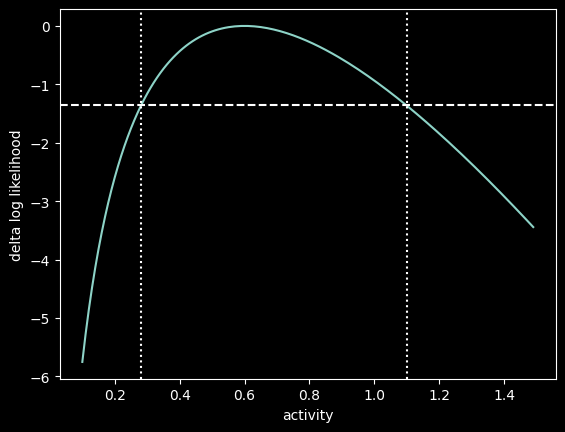

Point estimate = 0.6 and approximate 90% interval = [ 0.28 , 1.1 ]


In [7]:
# find the point estimate and approximate confidence intervals by brute force

cl = '90'
delta_ll = {'68':0.5, '90':1.36}

arg_max = np.argmax(likelihood_values)
max_l = likelihood_values[arg_max]

dll = []
for lv in likelihood_values:
    dll.append(np.log(lv)-np.log(max_l))

half = int(len(a_values)/2)
dllo = np.abs(np.array(dll)+delta_ll[cl])
a_low = round(a_values[np.argmin(dllo[:half])],2)
a_high = round(a_values[half+np.argmin(dllo[half:])],2)

plt.plot(a_values,dll)
plt.ylabel('delta log likelihood')
plt.xlabel('activity')
plt.axhline(y=-delta_ll[cl],ls='--')
plt.axvline(x=a_low,ls=':')
plt.axvline(x=a_high,ls=':')
plt.show()

print('Point estimate =',round(a_values[arg_max],2),
      'and approximate '+cl+'% interval = [',a_low,',',a_high,']')